In [181]:
# import necessary libraries
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
iris = load_iris()

### Project 1: the Iris Data Set

In [182]:
# view the data structure and briefly visualize the data

In [183]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [184]:
iris['data'][0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [185]:
iris['target'][0:5]

array([0, 0, 0, 0, 0])

In [186]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [187]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [188]:
pd.DataFrame(iris['data'], columns = iris['feature_names']).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


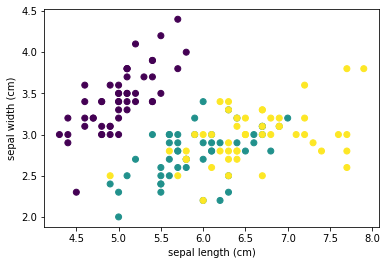

In [189]:
plt.scatter(iris['data'][:,0], iris['data'][:,1], c=iris['target'])
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.show()

real classifications


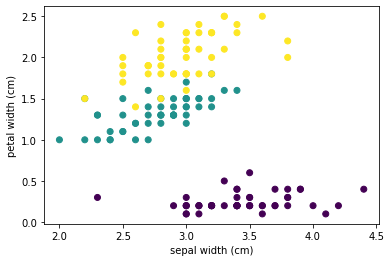

In [190]:
# this function will allow you to visualize any combination pair of features

def real_data(pair):
    print('real classifications')
    x_axis=pair[0]
    y_axis=pair[1]
    plt.scatter(iris['data'][:,x_axis], iris['data'][:,y_axis], c=iris['target'])
    plt.xlabel(iris['feature_names'][x_axis])
    plt.ylabel(iris['feature_names'][y_axis])
    plt.show()
    
real_data((1,3))

In [191]:
# define X and y variables
X = iris['data']
y = iris['target']

# define the SVM model
model = svm.SVC(kernel='linear')

# define the number of folds for cross-validation
n_folds = 5

# define the KFold object for cross-validation
kf = KFold(n_splits=n_folds)

# initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# loop through each fold
for train_index, test_index in kf.split(X):
    # split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train)
    
    # predict the classes of the test data for this fold
    y_pred = model.predict(X_test)
    
    # calculate the accuracy score for this fold
    accuracy = sum(y_pred == y_test) / len(y_test)
    
    # add the accuracy score for this fold to the list
    accuracy_scores.append(accuracy)

# print the average accuracy score over all folds
print("scores: :", accuracy_scores)
print("Average accuracy score:", sum(accuracy_scores) / n_folds)

scores: : [1.0, 1.0, 0.8666666666666667, 1.0, 0.8666666666666667]
Average accuracy score: 0.9466666666666667


In [192]:
X = iris['data']
y = iris['target']
model.fit(X, y)
y_pred = model.predict(X)


def prediction_data(pair):
    print('predicted classifications')
    x_axis=pair[0]
    y_axis=pair[1]
    plt.scatter(iris['data'][:,x_axis], iris['data'][:,y_axis], c=y_pred)
    plt.xlabel(iris['feature_names'][x_axis])
    plt.ylabel(iris['feature_names'][y_axis])
    plt.show()

predicted classifications


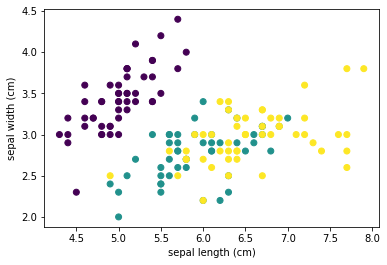

real classifications


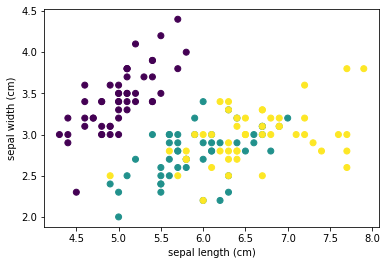

predicted classifications


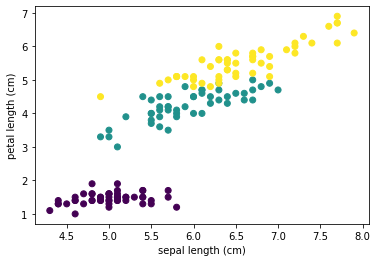

real classifications


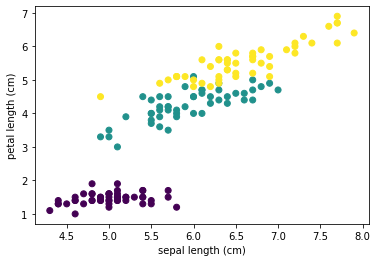

predicted classifications


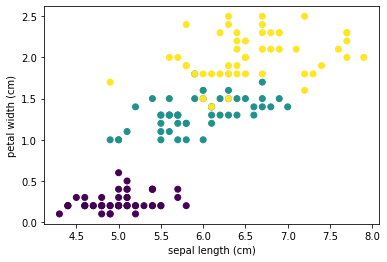

real classifications


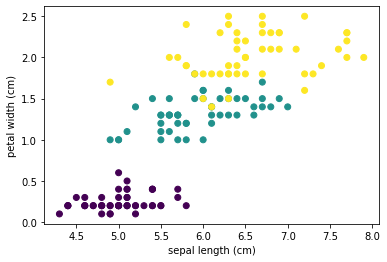

predicted classifications


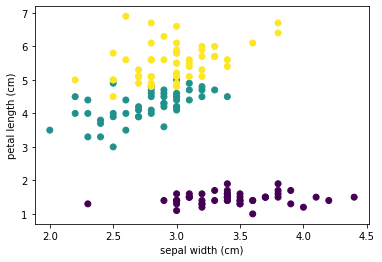

real classifications


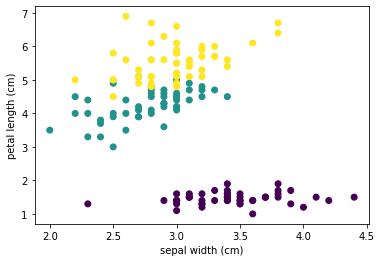

predicted classifications


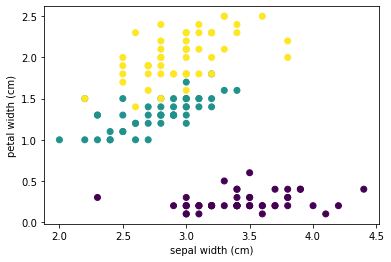

real classifications


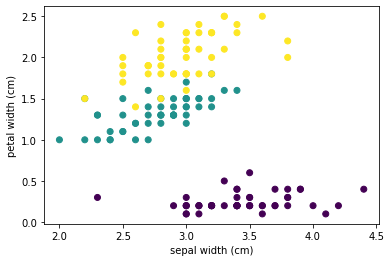

predicted classifications


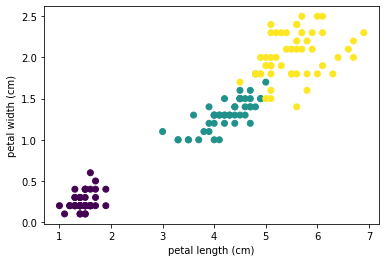

real classifications


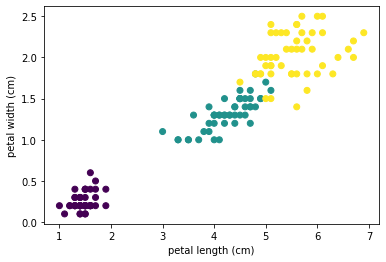

In [193]:
pairs = combinations(range(4),2)

for pair in pairs:
    prediction_data(pair)
    real_data(pair)

# Project 2: synthetic data set

In [194]:
# view the data structure and briefly visualize the data

In [211]:
data = make_classification(n_samples = 150, n_features = 5, n_classes = 3, n_clusters_per_class = 1)

In [ ]:
X = data[0]
y = data[1]

In [220]:
X[0:5]

array([[-1.28169399,  0.7486593 , -0.08932624, -0.74475794, -0.95048706],
       [-0.17626084,  0.94122687, -1.72406947,  1.62180483, -0.64290853],
       [ 1.18942842, -2.12142845,  1.55595799,  0.04256236,  2.24708861],
       [ 0.1773842 ,  1.00373667,  0.21355404, -1.52752891, -1.38849599],
       [ 0.2032463 ,  0.93094107,  0.43901901, -1.79917549, -1.37032663]])

In [223]:
y[0:5]

array([2, 1, 0, 2, 2])

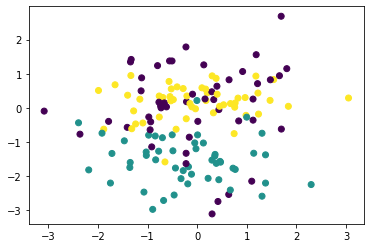

In [218]:
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()

In [ ]:
pairs = combinations(range(2),4)
def real_classifications2(pairs):
    